# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Patrick | Okafor | Patrick Okafor | 5 | 25% |
| Member 2: | Moses | Kimiji | Moses Kimiji | 5 | 25% |
| Member 3: | Ifeanyi | Afoama | Ifeanyi Afoama | 5 | 25% |
| Member 4: | Akachukwu | Okoye | Akachukwu Okoye | 5 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# Github Repository Link: https://github.com/ChidiPatrick/engg680_2024_fall.git

In [62]:
# some library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


First load the following datasets into dataframes. 
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning. 
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset. 
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [63]:
# (2 marks)
# TODO: Load cross-validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe
cv_set = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples). 

In [64]:
# TODO: Display first two rows of cv_set 
cv_set.head(2)
# (1 mark)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187,rest
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144,rest


In [65]:
# TODO: Load the info method of cv_set
display(cv_set.info())
# (1 mark)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

None

In [66]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [67]:
# TODO: Display all columns in cv_set 
print(f"cv_set columns: {cv_set.columns}")
# (1 mark)

cv_set columns: Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features. 

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y* 

In [68]:
# TODO - Load target vector into y
# (1 mark) 
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [69]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [71]:
# TODO - Perform test/train split 
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively. 

In [72]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options. 

In [75]:
# TODO - Setup grid set 
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

In [76]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [77]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



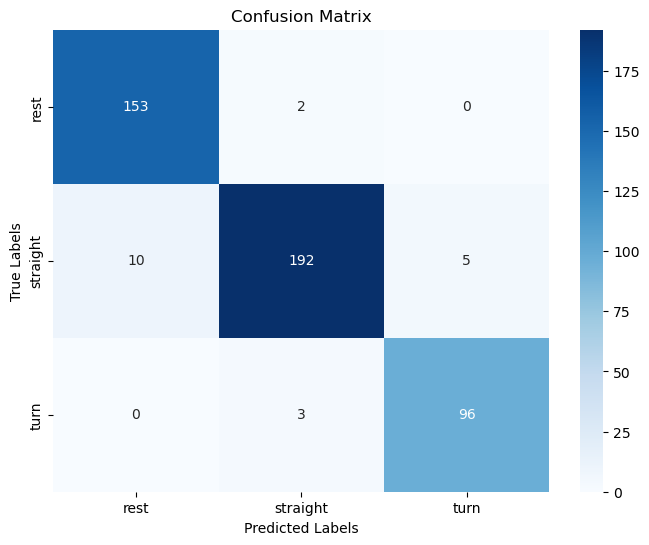

In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)

y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
**ANSWER TO QUESTION 1:**
From the confusion matrix and classification report of  the three states, the model fits perfectly well with the dataset, and its predictions are of high accuracy and precision. This shows that the model is of appropriate capacity.

**ANSWER TO QUESTION 2:**
The intervals for C and gamma are suitable because the chosen intervals provide a good balance between computational efficiency and parameter exploration.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [79]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [80]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [81]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

[[200  31   0]
 [  7 387  17]
 [  0   7 134]]
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



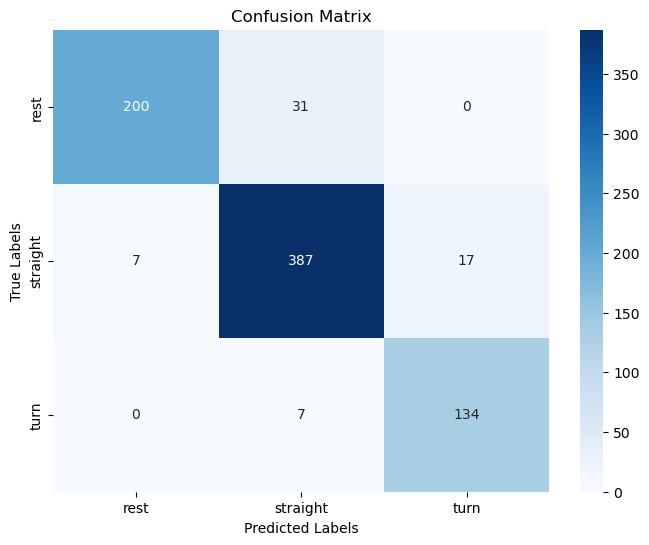

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y_pred = grid.predict(X1)
print(confusion_matrix(y1, y_pred))
print(classification_report(y1, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y1, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]


              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



c:\Users\User\Documents\Anaconda_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Documents\Anaconda_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Documents\Anaconda_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

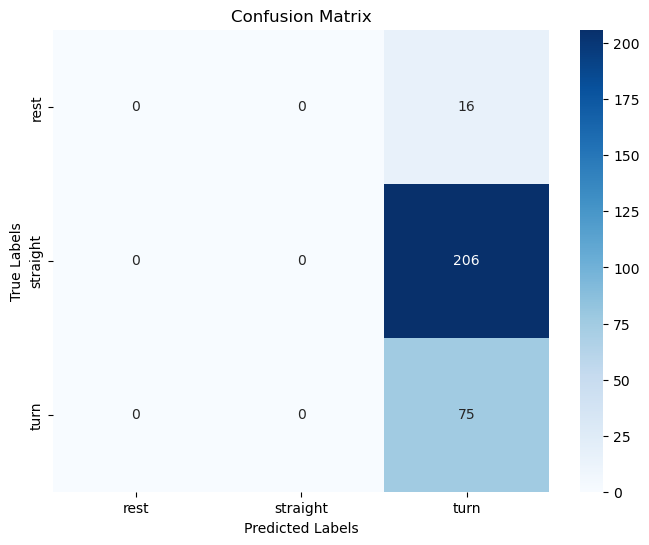

In [86]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
print(confusion_matrix(y2, y_pred))
print("\n")
print(classification_report(y2, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

#### 1.3.3 - Questions 

**Based on results so far** 
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
**ANSWER TO QUESTION 1:**

**Model Performance on X_test, and y_test:**
When the trained model was tested on X_test and y_test dataset,the model had an excellent performance. The precision for the three states(rest,straight, and turn) were 94%, 97%, and 95% respectively.It had an overall accuracy of 96%. This shows that the model was of appropriate capacity with the given dataset.

**Model Performance on X1, and y1:**
When the X1 and y1 dataset were used, the model generalized well with the data. The precision for rest,straight and turn were 97%, 91%, and 89% respectively. The overall accuracy was 92%. From the performance metrics of the model above, it could be seen that the model generalized well with the given dataset.

**Model Performance on X2, and y2:**
The test performed on this dataset produced a very poor result. Starting from the confusion matrix, the model failed to accurately predict rest and straight states of the vehicle as evident in the confusion matrix. The precision for rest and straight states are both zeros(0), and that of turn state was 25%. This shows that the model didn't generalize well with the given dataset, hence the poor performance.This is an example of **"Overfitting"** where a complex model performs wells on a simple training dataset, but fails to generalize on unseen dataset because it memorized everything in the trainig dataset including noise.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [87]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [88]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [89]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline into variable pipe
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

# Setup grid set
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [90]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test,y_test)))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]


              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



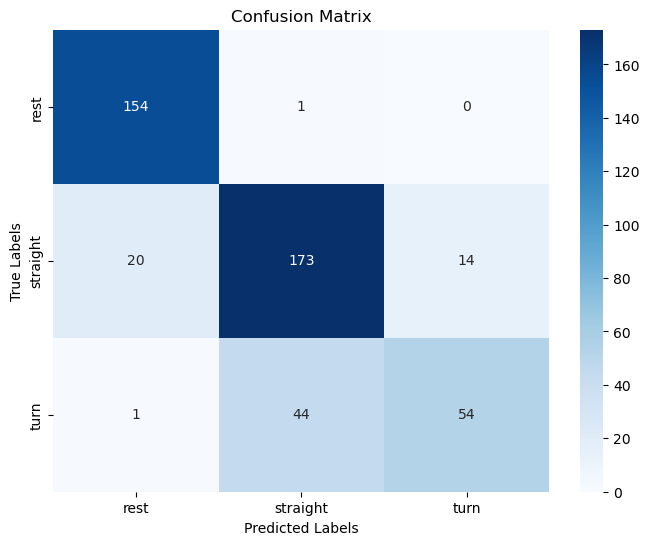

In [91]:
# TODO - Display confusion matrix and print classification reports
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test,y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer 
1.For the training/cross-validation dataset of section 1, the confusion matrix shows that for the "rest" class, only two data points were misclassified as straight. For "straight" class, 10 points were misclassified as rest and 5 points were misclassified as turn. In the last classification, only 3 data points were misclassified as straight class.The accuracy of the model is 96%.

For the taining/cross-validation dataset of section 2, the  confusion matrix shows that for the "rest" class, only one point was misclassified as "straight" instead of rest. For the straight class, we have 20 points misclassified rest, and 14 points misclassified as turning. And lastly for the "turn" class, we have 1 point misclassified as rest, and 44 points misclassified as straight. The overall accuracy for this dataset is 83%.

From the performance metrics of two datasets, the model with better fit is that of section 1 with accuracy of 96%, and a minimum number of misclassifications.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [97]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [98]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [99]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2,y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]


              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



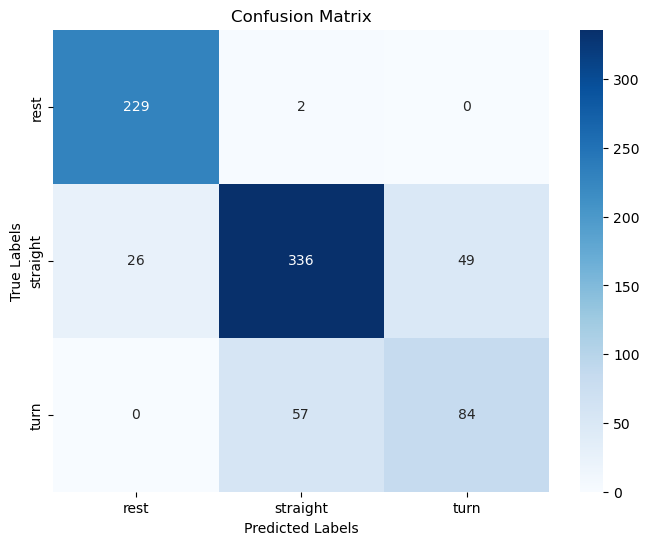

In [100]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred = grid.predict(X1)
print(confusion_matrix(y1, y_pred))
print("\n")
print(classification_report(y1, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y1, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]


              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



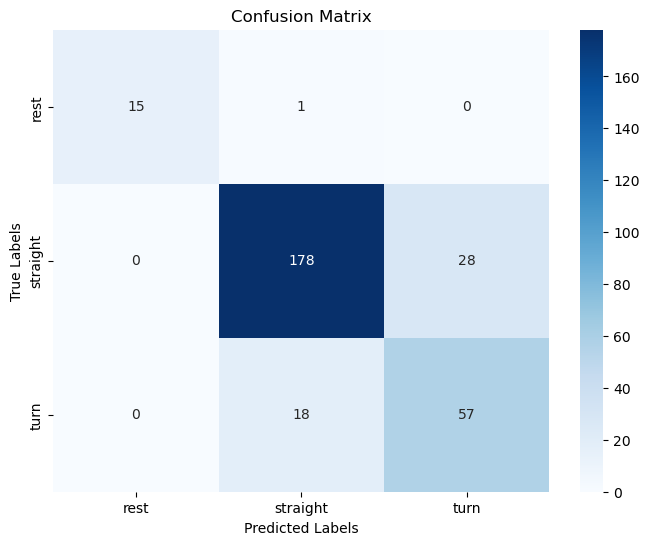

In [103]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
print(confusion_matrix(y2, y_pred))
print("\n")
print(classification_report(y2, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
**Answer to Question 1:**

**Model Performance on Training/Validation Set:** In this case, the precision for rest, straight, and turn states are: 88%, 79%, and 79% respectively. The overall accuracy is 83%, and the confusion matrix has one point misclassified as straight state for the rest class. In the straight class (row 2), 20 points were misclassified as rest state, and 14 as turn state.

**Model Performance on Test 1 dataset:** For test 1 dataset, the overall accuracy is 83%. In the confusion matrix, we have a lot of misclassification in the "straight" class, 26 points were misclassified as rest state, while 49 points were misclassified as turn state. In the turn class (row 3), 57 points were misclassified as straight points.The precision for rest, straight, and turn states are: 90%,85%, and 63% respectively. There's a significant drop in precision and accuracy level in this case.

**Model Performance on Test 2 dataset:** The precision for rest, straight, and turn states are: 100%, 90%, and 67%. The overall accuracy is 84%. The confusion matrix has only one misclassification in the rest class, 28 misclassification in the straight class, and 18 misclassification in the turn class.

From the performance matrices of the training and test datasets above, the model generalizes well across datasets for the "Rest" and "Straight" classes, maintaining stable performance. The "Turn" class remains a persistent challenge, with consistently low precision, recall and F1-scores.The model demonstrates a good overall fit, with no significant signs of overfitting or underfitting. However, further refinements are needed to improve the recognition of the "Turn" class, as this is a key area of weakness.

**Answer to Question 2:**

**Section 1 and 2 Training Dataset Comparision:**
Section 1's model is a better fit for the training data. It demonstrates high accuracy and balanced performance across all classes, whereas Section 2's model struggles, particularly with the "Turn" class, suggesting underfitting for this class.

**Section 1 and 2 Test 1 Dataset Comparision:**
Section 1's model significantly outperforms Section 2's on Test 1. Section 1 maintains balanced and high performance across all classes, while Section 2 continues to underperform on the "Turn" class, dragging down its overall performance.

**Section 1 and 2 Test 2 Dataset Comparision:**
Section 2's model significantly outperforms Section 1's on Test 2. Section 1 completely fails for "Rest" and "Straight" classes, indicating poor generalization to this dataset. Conversely, Section 2 model maintains stable performance across all classes and shows improvement in "Turn" performance.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)

**Features Selected are: 'a_sum', 'g_sum', 'ax_var', 'gy_var','az_max'**

**a_sum(Sum of Accelerations Across All Axes):** This represents the overall magnitude of linear acceleration, which can differentiate motion states (e.g., rest, straight, turn).By aggregating accelerations along all axes, it reduces the impact of noise in individual components. It helps in recognizing changes in motion intensity, such as acceleration during "straight" movement or a sudden stop.

**g_sum (Sum of Angular Velocities Across All Axes):** It reflects the overall rotational movement, which is crucial for detecting "turns" or rotational motions. Like a_sum, it minimizes noise by combining data from all axes. It distinguishes rotational states (turning) from linear movements (rest, straight).

**ax_var (Variance of Acceleration in the X-Axis):** Variance measures fluctuations in motion, helping identify unstable or erratic states. It Helps differentiate between smooth movements (e.g., "rest" or "straight") and erratic transitions.

**gy_var (Variance of Angular Velocity in the Y-Axis):** Variance of angular velocity indicates how consistently the device rotates around the Y-axis. The Y-axis often corresponds to side-to-side rotational motion. This feature helps identify rotational irregularities, making it useful for detecting "turns."

**az_max (Maximum Acceleration in the Z-Axis):** The Z-axis typically corresponds to vertical motion (e.g., jumping or vibrations). Maximum values highlight extreme motion events, such as sudden impacts or abrupt stops.This identifies motion patterns that involve significant vertical activity or impact.


**Answer**
1.   

In [104]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['a_sum', 'g_sum', 'ax_var', 'gy_var','az_max']]
X.head(2)

,a_sum,g_sum,ax_var,gy_var,az_max
0,9.797418,0.022554,8.046094e-07,6.964705e-10,0.024992
1,9.798815,0.021731,1.032619e-06,6.533136e-10,0.024828


In [105]:
# TODO - Load motion_state column (target vector) into y
y =  cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [106]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline into variable pipe
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

# Setup grid set
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf'] 
}

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [107]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format((max(grid.cv_results_['mean_train_score']))))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.93
Test-set score: 0.93


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

[[152   3   0]
 [ 11 190   6]
 [  0  11  88]]


              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       155
    straight       0.93      0.92      0.92       207
        turn       0.94      0.89      0.91        99

    accuracy                           0.93       461
   macro avg       0.93      0.93      0.93       461
weighted avg       0.93      0.93      0.93       461



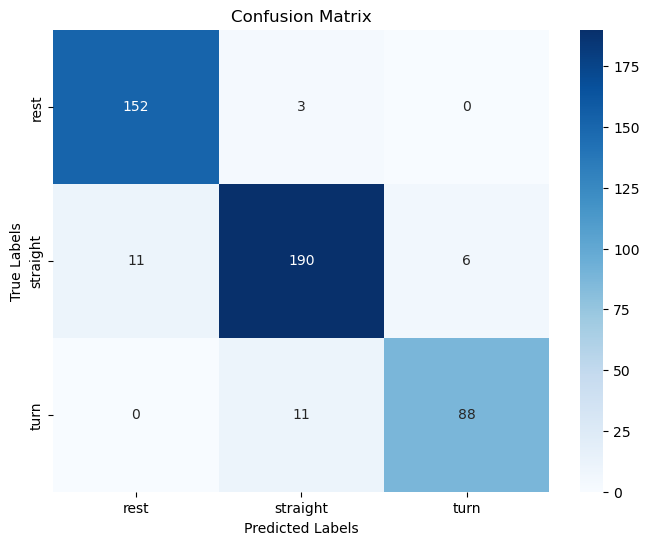

In [108]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [109]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 =  test_set1[['a_sum', 'g_sum', 'ax_var', 'gy_var','az_max']]
X1.head(2)

,a_sum,g_sum,ax_var,gy_var,az_max
0,9.801661,0.025634,0.000001,6.507877e-10,0.024884
1,9.802481,0.025218,0.000001,6.788807e-10,0.024881


In [110]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['a_sum', 'g_sum', 'ax_var', 'gy_var','az_max']]
X2.head(2)

,a_sum,g_sum,ax_var,gy_var,az_max
0,9.800683,0.012437,0.000002,1.211633e-09,0.049701
1,9.797741,0.013805,0.000003,1.893673e-09,0.050477


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [113]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.78
test_set2 score: 0.68


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

[[140  91   0]
 [  6 365  40]
 [  0  35 106]]


              precision    recall  f1-score   support

        rest       0.96      0.61      0.74       231
    straight       0.74      0.89      0.81       411
        turn       0.73      0.75      0.74       141

    accuracy                           0.78       783
   macro avg       0.81      0.75      0.76       783
weighted avg       0.80      0.78      0.78       783



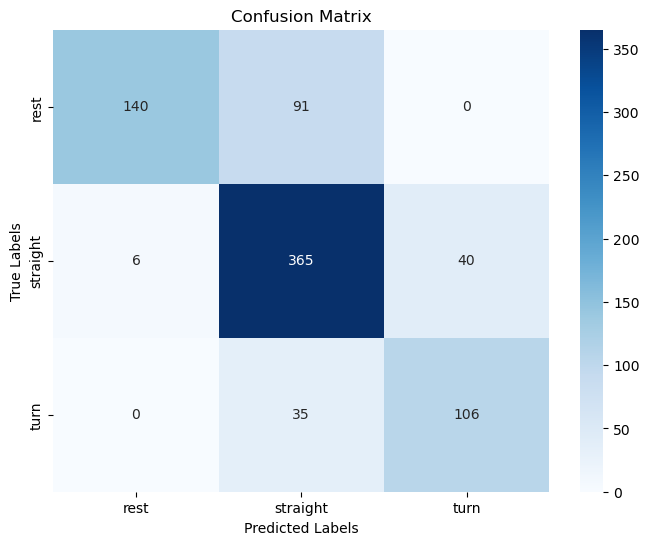

In [114]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred = grid.predict(X1)
print(confusion_matrix(y1, y_pred))
print("\n")
print(classification_report(y1, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y1, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

[[  0   0  16]
 [  0 190  16]
 [  0  63  12]]


              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.75      0.92      0.83       206
        turn       0.27      0.16      0.20        75

    accuracy                           0.68       297
   macro avg       0.34      0.36      0.34       297
weighted avg       0.59      0.68      0.63       297



c:\Users\User\Documents\Anaconda_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Documents\Anaconda_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Documents\Anaconda_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

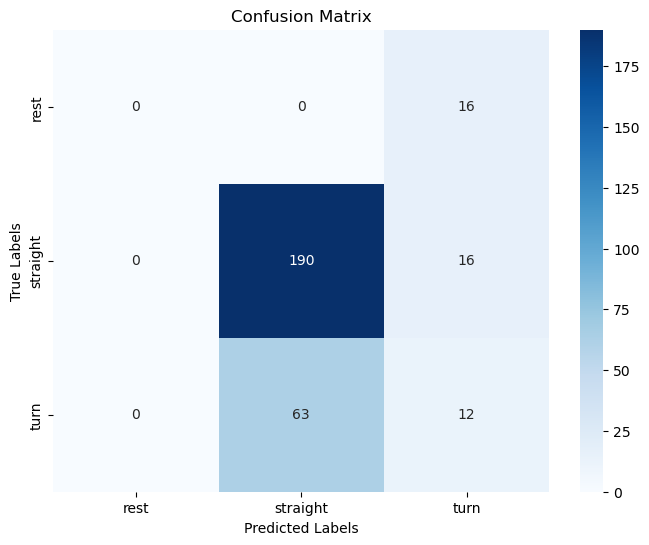

In [115]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
print(confusion_matrix(y2, y_pred))
print("\n")
print(classification_report(y2, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*. 

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
**Answer to Question 1.1**

**Training Dataset Performance:**
Section 1 model performs slightly better on the training dataset, with higher accuracy and balanced F1-scores across all classes. On the other hand, Section 3 model struggles with the "turn" class (lower recall, 0.89 against 0.97 in Section 1), resulting in lower overall performance.

**Test 1 Dataset Performance**
Section 1 model performs consistently well across all classes on Test 1, with balanced precision, recall, and F1-scores, while Section 3 model struggles, particularly with the "rest" (F1: 0.74) and "turn" (F1: 0.74) classes, which drag down its overall performance.

**Test 2 Dataset Performance**
Section 1 model fails entirely on Test 2, likely due to poor generalization to new data distributions,while on the other hand, Section 3 model adapts better to Test 2, achieving decent performance for the "straight" class (F1: 0.83), but struggles with "turn" and "rest."

**Answer to Question 1.2**

*Training Dataset Performance:* Section 3 model outperforms Section 2 model on the training dataset, particularly in handling the "turn" class. The higher accuracy and macro F1-score shows that Section 3 has a better fit to the training data.

**Test 1 Dataset Performance**
In this case, Section 2 model performs better overall on Test 1, with higher accuracy and balanced performance across classes. Section 3 model struggles with the "rest" class (F1: 0.74) but handles "turn" (F1: 0.74) better than Section 2. Section 2's model has more consistent generalization across all classes.

**Test 2 Dataset Performance**
Section 2 model generalizes far better to the Test 2 dataset, achieving significantly higher accuracy and F1-scores across all classes. On the other hand, Section 3 model struggles with both "rest" and "turn" in Test 2, while Section 2 model maintains balanced performance.

**Answer to Question 2**

The differences in the models' performances across the three sections can be attributed to a combination of factors, including data characteristics, feature selection, model complexity, and training or evaluation conditions.

**Feature Selection:** Section 1 leveraged a well-balanced feature set, achieving strong performance on training and Test 1 but overfitting, leading to poor generalization on Test 2. Section 2 used a more generalized feature set, avoiding overfitting and achieving better Test 2 generalization, though it struggled with the "turn" class. Section 3 overemphasized features for "turn," resulting in strong training performance for that class but poor generalization to diverse datasets, especially for "rest" and "straight."

**Data Characteristics and Preprocessing:** Differences in training data distributions likely influenced the models' learning patterns across sections. Section 1's training data may have closely resembled Test 1, leading to strong performance there but overfitting and poor generalization to Test 2. Section 2 likely had a more diverse training set, enabling better generalization to unseen scenarios like Test 2 but resulting in moderate training performance. Test 2's distinct distribution, possibly with imbalanced classes or new conditions, favored Section 2's generalized features. Class imbalance, particularly in the "turn" class, might have impacted generalization, with Section 1 potentially using balancing techniques, while Section 2 struggled with underfitting for this class.

**Class-Specific Performance:**
Section 1 demonstrated excellent performance on training and Test 1 due to strong feature engineering but overfit to "rest" and "straight," leading to poor generalization on Test 2. Section 2 showed consistent performance across datasets with balanced features and conservative tuning but struggled with "turn," indicating underfitting or insufficient rotational features. Section 3 excelled in "turn" on training data but overemphasized rotational features, resulting in poor generalization for "rest" and "straight" on Test 2.


____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [153]:
# TODO - Load all features from cv_set to X
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [155]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [156]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [157]:
# Perform any missing imports

# TODO - Initiate the pipeline 
# (1 marks)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('svc', SVC())])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [158]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf'],
    'pca__n_components': [4, 7, 11, 14, 16]
}

In [159]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [4, 7, 11, 14, 16],
                         'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [160]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format((max(grid.cv_results_['mean_train_score']))))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'pca__n_components': 14, 'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.94
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

[[154   1   0]
 [  9 192   6]
 [  0   2  97]]


              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       155
    straight       0.98      0.93      0.96       207
        turn       0.94      0.98      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.97      0.96       461
weighted avg       0.96      0.96      0.96       461



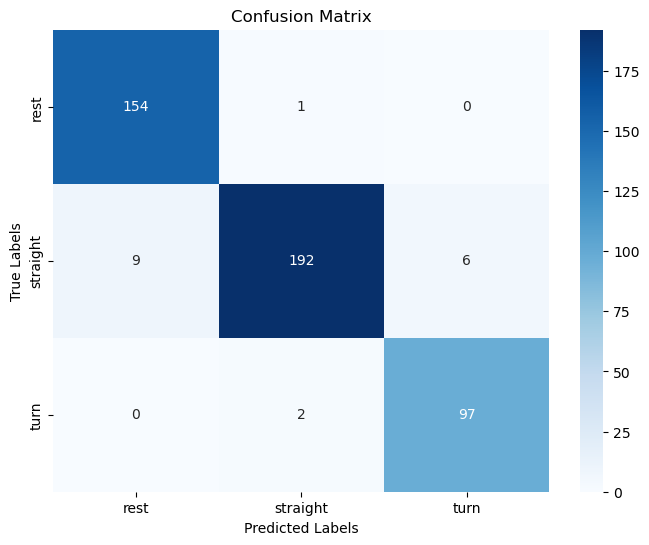

In [161]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [162]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [163]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [164]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.93
test_set2 score: 0.67


[[223   8   0]
 [ 20 372  19]
 [  0   6 135]]


              precision    recall  f1-score   support

        rest       0.92      0.97      0.94       231
    straight       0.96      0.91      0.93       411
        turn       0.88      0.96      0.92       141

    accuracy                           0.93       783
   macro avg       0.92      0.94      0.93       783
weighted avg       0.93      0.93      0.93       783



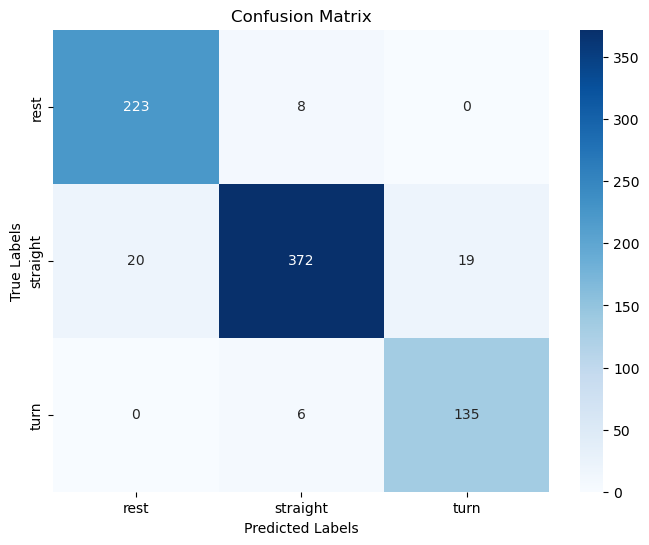

In [165]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred = grid.predict(X1)
print(confusion_matrix(y1, y_pred))
print("\n")
print(classification_report(y1, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y1, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

[[  5  11   0]
 [  0 119  87]
 [  0   1  74]]


              precision    recall  f1-score   support

        rest       1.00      0.31      0.48        16
    straight       0.91      0.58      0.71       206
        turn       0.46      0.99      0.63        75

    accuracy                           0.67       297
   macro avg       0.79      0.63      0.60       297
weighted avg       0.80      0.67      0.67       297



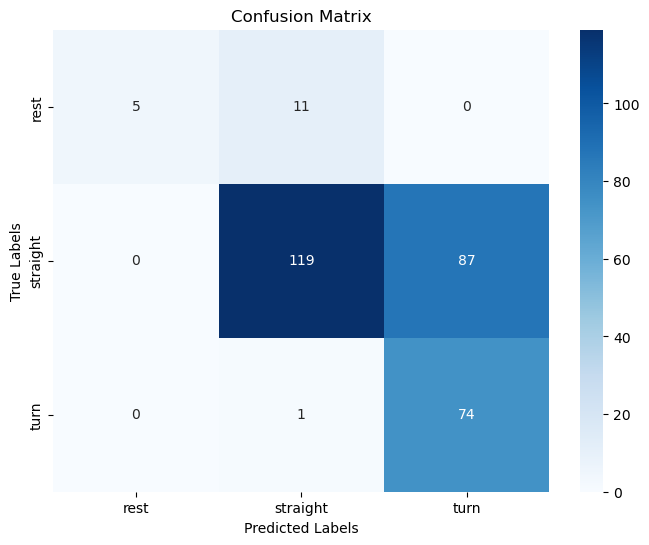

In [166]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
print(confusion_matrix(y2, y_pred))
print("\n")
print(classification_report(y2, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*. 
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

**Answer to Question 1.1**
The model trained in Section 4 with PCA demonstrates strong performance on the training dataset and Test 1, comparable to Section 1, with similar accuracy (96% training and 93% Test 1) and balanced metrics across classes. However, on Test 2, Section 4 generalizes better for the "turn" class (F1: 0.63 vs. 0.40 in Section 1) and "straight" (F1: 0.71 vs. 0.00 in Section 1), though it struggles with the "rest" class (F1: 0.48). In contrast, Section 1 fails entirely on Test 2 due to overfitting. Overall, Section 4 with PCA achieves improved generalization to unseen data while maintaining strong performance on similar datasets, making it more robust than Section 1.

**Answer to Question 1.2**

The model trained in Section 4 with PCA outperforms the Section 2 model on the training and Test 1 datasets, achieving higher accuracy (96% vs. 83% on training and 93% vs. 83% on Test 1) and more balanced class performance. However, on Test 2, Section 2 generalizes better overall, particularly for "straight" (F1: 0.88 vs. 0.71) and "rest" (F1: 0.97 vs. 0.48), while the Section 4 model performs slightly better on "turn" (F1: 0.63 vs. 0.71). While Section 4 demonstrates stronger performance on similar datasets, Section 2 maintains superior generalization across diverse data distributions.

**Answer to Question 1.3**

The model trained in Section 4 with PCA outperforms the Section 3 model on the training and Test 1 datasets, achieving higher accuracy (96% vs. 93% on training and 93% vs. 78% on Test 1) and more balanced performance across classes. On Test 2, the Section 4 model also performs better overall, particularly for the "turn" class (F1: 0.63 vs. 0.20) and "straight" (F1: 0.71 vs. 0.83), though both models struggle with "rest" (F1: 0.48 vs. 0.00). Overall, the Section 4 model demonstrates better performance and generalization across datasets, making it more robust than the Section 3 model.

**Answer to Question 2**

**Feature Dimensionality and PCA Impact:** Section 1 used the full feature set, capturing detailed information but introducing noise or redundancy, leading to overfitting on the training data and poor generalization to Test 2. In contrast, Section 4 used PCA to reduce feature dimensionality, eliminating noise and redundancy while retaining essential variance, which improved generalization to unseen data like Test 2, though with a slight trade-off in precision on the training and Test 1 datasets.

**Generalization to Diverse Distributions:** Section 1 overfit to the training data, relying on specific patterns that failed to generalize, leading to a complete breakdown for "rest" and "straight" on Test 2. In contrast, Section 4 used PCA to focus on broader patterns, improving generalization to Test 2, with moderate success in predicting "straight" and "turn," though it still struggled with "rest."

**Data Characteristics and Preprocessing:**
Section 1's training set likely resembled Test 1, resulting in strong performance on that dataset but poor generalization to Test 2. Section 4, with PCA, mitigated training data biases by focusing on principal components, allowing better adaptation to Test 2's differing distribution.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer** 
**Answer**

The Machine learning model we selected is **Random Forest**. Reason being that Random Forest is an ensemble learning method that combines multiple decision trees trained on different subsets of data. This reduces the likelihood of overfitting compared to individual decision trees. Since it is suitable for working on subsets of a dataset, it is the ideal model for this task.

In [167]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [168]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [169]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [170]:
# Perform any missing imports
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# TODO - Initiate the pipeline 
# (1 mark)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

In [171]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True,False]
} 

In [172]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__bootstrap': [True, False],
                         'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [140]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format((max(grid.cv_results_['mean_train_score']))))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'rf__bootstrap': True, 'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.85
Test-set score: 0.84


Display the confusion matrix and print the classification report for the trained model using the *test* split. 

[[146   9   0]
 [  5 184  18]
 [  1  39  59]]


              precision    recall  f1-score   support

        rest       0.96      0.94      0.95       155
    straight       0.79      0.89      0.84       207
        turn       0.77      0.60      0.67        99

    accuracy                           0.84       461
   macro avg       0.84      0.81      0.82       461
weighted avg       0.84      0.84      0.84       461



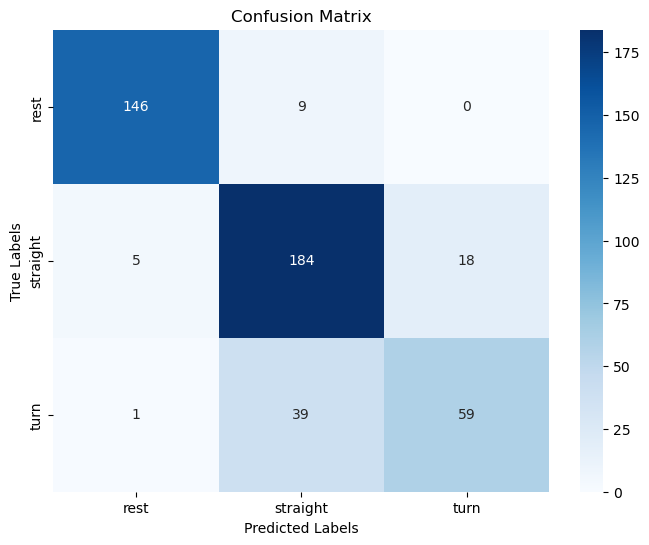

In [141]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2. 
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [142]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [143]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score. 

In [144]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.85
test_set2 score: 0.71


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

[[226   5   0]
 [  3 359  49]
 [  0  63  78]]


              precision    recall  f1-score   support

        rest       0.99      0.98      0.98       231
    straight       0.84      0.87      0.86       411
        turn       0.61      0.55      0.58       141

    accuracy                           0.85       783
   macro avg       0.81      0.80      0.81       783
weighted avg       0.84      0.85      0.84       783



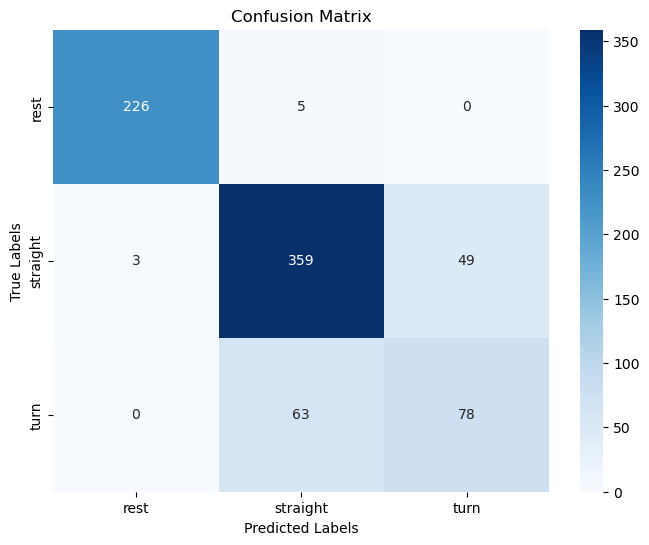

In [145]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y_pred =grid.predict(X1)
print(confusion_matrix(y1, y_pred))
print("\n")
print(classification_report(y1, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y1, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

[[ 11   5   0]
 [  0 129  77]
 [  0   4  71]]


              precision    recall  f1-score   support

        rest       1.00      0.69      0.81        16
    straight       0.93      0.63      0.75       206
        turn       0.48      0.95      0.64        75

    accuracy                           0.71       297
   macro avg       0.80      0.75      0.73       297
weighted avg       0.82      0.71      0.72       297



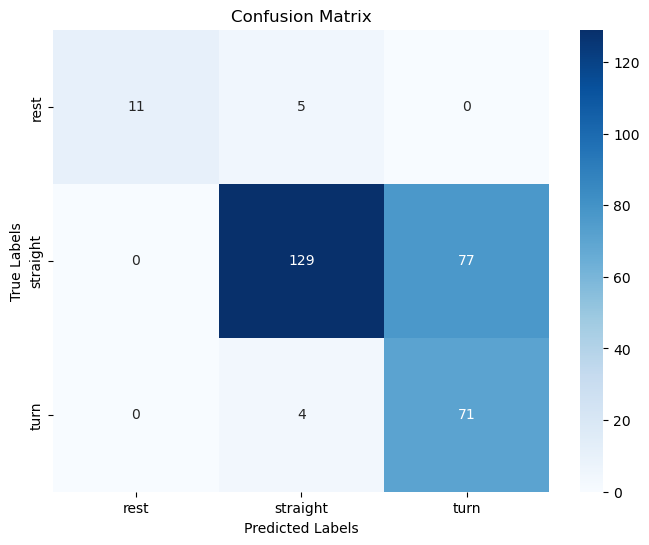

In [146]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y_pred = grid.predict(X2)
print(confusion_matrix(y2, y_pred))
print("\n")
print(classification_report(y2, y_pred))

# Plot Confusion Matrix
confusionMatrix = confusion_matrix(y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer 
**Training Dataset Performance**
On the training dataset, Random Forest achieves accuracy of 84% with a turn recall of 60%, slightly outperforming SVC's accuracy of 83% and turn recall of 55%, showing better balance and handling of nonlinear relationships.

**Test 1 Dataset Performance:** On Test 1, Random Forest achieves accuracy of 85% and turn F1-score of 0.58, while SVC achieves accuracy of 83% and a slightly better turn F1-score of 0.61, indicating comparable overall performance with SVC excelling in the "turn" class.

**Test 2 Dataset Performance:** On Test 2, SVC outperforms Random Forest with a macro F1-score of 0.85 vs. 0.73 and accuracy of 84% vs. 71%. SVC excels in the "straight" class with an F1-score of 0.88 compared to Random Forest's 0.75, demonstrating better generalization across all classes.

**Better Fit Model:** SVC fits better for generalization, outperforming Random Forest on Test 2 with higher metrics across all classes. However, Random Forest performs slightly better on the training and Test 1 datasets, especially in handling the "turn" class. Overall, SVC model is a better choice in this case because the task requires strong generalization to diverse or unseen datasets.

**Causes of Discrepancies**

**Algorithm Characteristics:** SVC optimizes a hyperplane in high-dimensional space, allowing it to generalize better to diverse datasets like Test 2, particularly when using nonlinear kernels. In contrast, Random Forest relies on ensemble decision trees, which can overfit if not properly regularized, as individual trees may memorize patterns specific to the training distribution, leading to reduced generalization.

**Model Regularization:** SVC's hyperparameters, such as the regularization parameterC, likely prevented overfitting and ensured better generalization. Random Forest, however, could have benefited from additional tuning of parameters like max_depth or min_samples_split to reduce overfitting and improve generalization to unseen data.

**Class Balance and Distribution:** Test 2's diverse distribution favored SVC, which benefits from regularization and margin optimization to handle imbalanced and varied patterns effectively. In contrast, Random Forest's decision tree splits might struggle with imbalanced or unseen data distributions, reducing its ability to generalize well.



____